In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import missingno as msno

%matplotlib inline
warnings.filterwarnings("ignore")

## **Reading Data and Selecting The Variables**


In [13]:
working_directory = "\\".join(os.getcwd().split("\\")[:-1])
DATASETS = os.path.join(working_directory, "data")
RAW_PATH = os.path.join(DATASETS, "raw")
parquet_name = os.path.join(RAW_PATH, "bfrss2021.parquet")

In [14]:
df = pd.read_parquet(parquet_name)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Columns: 303 entries, _STATE to _VEGETE1
dtypes: float64(295), object(8)
memory usage: 1014.1+ MB


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,01192021,01,19,2021,1100.0,2021000001,2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,01212021,01,21,2021,1100.0,2021000002,2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,01212021,01,21,2021,1100.0,2021000003,2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,0.0,0.0
3,1.0,1.0,01172021,01,17,2021,1100.0,2021000004,2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,01152021,01,15,2021,1100.0,2021000005,2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,0.0,0.0


In [15]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_FRTRES1', '_VEGRES1', '_FRUTSU1', '_VEGESU1', '_FRTLT1A', '_VEGLT1A',
       '_FRT16A', '_VEG23A', '_FRUITE1', '_VEGETE1'],
      dtype='object', length=303)

In [16]:
columns = ["GENHLTH",       # categorical
           "PHYSHLTH",      # numerical
           "CELLSEX",      # categorical
           "MENTHLTH",      # numerical
           "PRIMINSR",      # categorical
           "MEDCOST1",      # categorical
           "CHECKUP1",      # categorical
            "EXERANY2",
            "CVDINFR4",
            "CVDCRHD4",
            "CVDSTRK3",
            "ADDEPEV3",
            "CHCKDNY2",
            "HAVARTH5",
            "DIABETE4",
            "MARITAL",
            "EDUCA",
            "RENTHOM1",
            "EMPLOY1",
            "PREGNANT",
            "DIFFWALK",
            "DIFFDRES",
            "HADSIGM4",
            "SMOKDAY2",
            "ECIGNOW1",
            "CSRVTRT3",
            "CIMEMLOS",
            "ACEDIVRC",
            "ACETOUCH",
            "SMOKE100",
            "STOPSMK2",
            "SOMALE",
            "MSCODE",
            "_MENT14D",
            "_AGE_G",
            "_CHLDCNT",
            "_EDUCAG",
            "SEXVAR",
            "_IMPRACE",
            "_RFBMI5",
            "_TOTINDA",
            "_SMOKER3",
            "DRNKANY5",
            "_AGE65YR"]

# _AGE_G  YAŞ kolonu olarak kullanılacak

In [17]:
df = df[columns]

**Looking for Missing Values and Handling Them**


Since missing values are very few compared to the size of the data, there is no problem in deleting them.


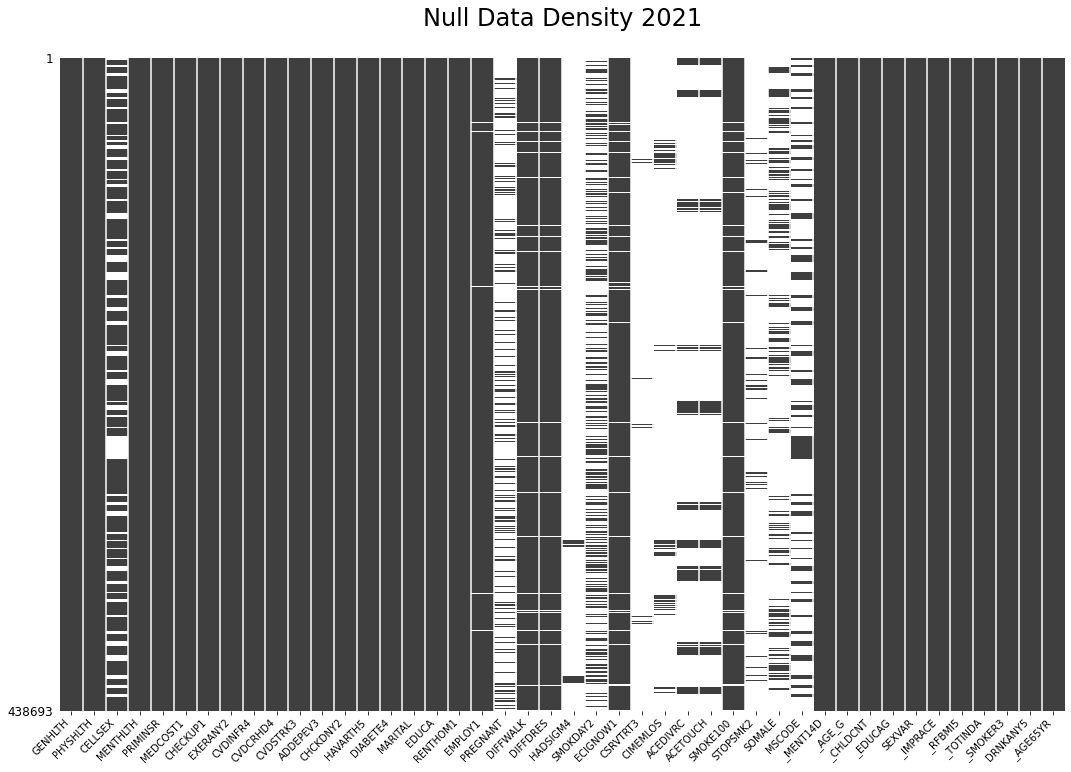

In [19]:
# Visualize null data density
msno.matrix(df, figsize=(18,12), sparkline=False, fontsize=10)

# Set the title
plt.title('Null Data Density 2021', fontsize=24, y=1.04)

# Move the x-axis tick labels below the graph by adjusting the layout
ax = plt.gca()
ax.xaxis.tick_bottom()

# Set custom tick positions and labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45, ha='right')

if not os.path.exists(r"..\graphs\EDA\2021"):
    os.makedirs(r"..\graphs\EDA\2021")

# Save the figure
plt.savefig(r"..\graphs\EDA\2021\null-data-density-2021.png", facecolor="white", bbox_inches = "tight",pad_inches=0.3)

# Show the plot
plt.show()

In [20]:
# Set the threshold for null values
threshold = 0.05  # Adjust as needed

# Calculate the number of non-null values required for a column to be retained
min_non_nulls = int((1 - threshold) * len(df))

# Drop columns based on the threshold
df = df.dropna(axis=1, thresh=min_non_nulls)

In [21]:
# Set the threshold for null values
threshold = 0.05 # Adjust as needed


# Calculate the number of non-null values required for a row to be retained
min_non_nulls = int((1 - threshold) * len(df.columns))

# Drop rows based on the threshold
df = df.dropna(axis=0, thresh=min_non_nulls)

In [22]:
df

,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,...,_AGE_G,_CHLDCNT,_EDUCAG,SEXVAR,_IMPRACE,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,_AGE65YR
0,5.0,20.0,10.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,6.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0
1,3.0,88.0,88.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,...,6.0,1.0,4.0,2.0,2.0,9.0,1.0,4.0,2.0,2.0
2,2.0,88.0,88.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,6.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0
3,2.0,88.0,10.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,5.0,1.0,2.0,2.0,1.0,2.0,1.0,4.0,1.0,1.0
4,5.0,30.0,88.0,3.0,2.0,1.0,1.0,1.0,7.0,1.0,...,6.0,1.0,1.0,1.0,6.0,2.0,1.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438688,2.0,88.0,20.0,88.0,1.0,4.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0
438689,3.0,88.0,88.0,77.0,2.0,1.0,2.0,2.0,2.0,2.0,...,6.0,1.0,2.0,1.0,6.0,9.0,2.0,4.0,2.0,2.0
438690,2.0,88.0,88.0,10.0,2.0,1.0,1.0,2.0,2.0,2.0,...,4.0,1.0,4.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0
438691,2.0,88.0,88.0,3.0,2.0,1.0,1.0,2.0,2.0,2.0,...,6.0,1.0,2.0,1.0,2.0,1.0,1.0,4.0,1.0,2.0


In [23]:
df.dropna(inplace=True)

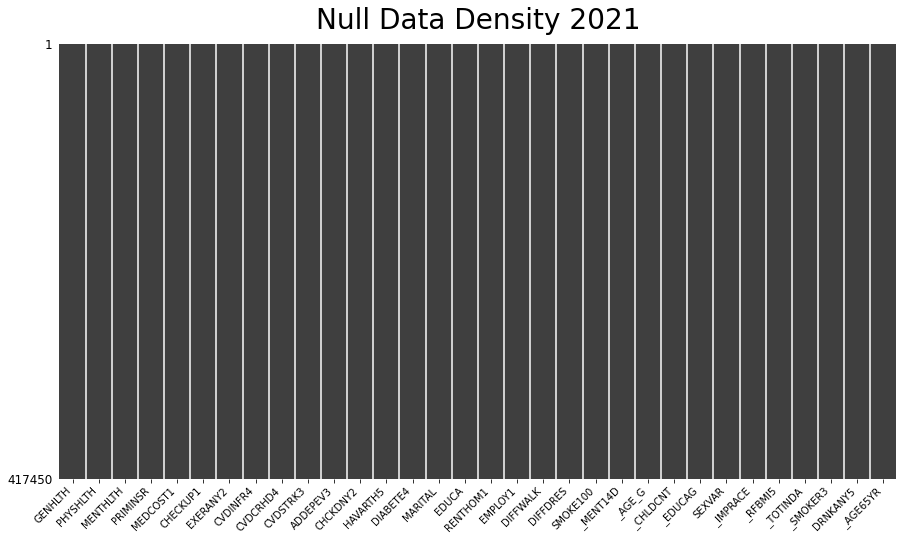

In [24]:
# Visualize null data density
msno.matrix(df, figsize=(15, 8), sparkline=False, fontsize=10)

# Set the title
plt.title('Null Data Density 2021', fontsize=28, y=1.02)

# Move the x-axis tick labels below the graph by adjusting the layout
ax = plt.gca()
ax.xaxis.tick_bottom()

# Set custom tick positions and labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45, ha='right')

# Show the plot
plt.show()

In [25]:
df

,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,...,_AGE_G,_CHLDCNT,_EDUCAG,SEXVAR,_IMPRACE,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,_AGE65YR
0,5.0,20.0,10.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,6.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0
1,3.0,88.0,88.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,...,6.0,1.0,4.0,2.0,2.0,9.0,1.0,4.0,2.0,2.0
2,2.0,88.0,88.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,6.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0
3,2.0,88.0,10.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,5.0,1.0,2.0,2.0,1.0,2.0,1.0,4.0,1.0,1.0
4,5.0,30.0,88.0,3.0,2.0,1.0,1.0,1.0,7.0,1.0,...,6.0,1.0,1.0,1.0,6.0,2.0,1.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438688,2.0,88.0,20.0,88.0,1.0,4.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0
438689,3.0,88.0,88.0,77.0,2.0,1.0,2.0,2.0,2.0,2.0,...,6.0,1.0,2.0,1.0,6.0,9.0,2.0,4.0,2.0,2.0
438690,2.0,88.0,88.0,10.0,2.0,1.0,1.0,2.0,2.0,2.0,...,4.0,1.0,4.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0
438691,2.0,88.0,88.0,3.0,2.0,1.0,1.0,2.0,2.0,2.0,...,6.0,1.0,2.0,1.0,2.0,1.0,1.0,4.0,1.0,2.0


In [26]:
df.isnull().sum().sum()

0

In [27]:
df.columns

Index(['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'MEDCOST1', 'CHECKUP1',
       'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ADDEPEV3', 'CHCKDNY2',
       'HAVARTH5', 'DIABETE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'EMPLOY1',
       'DIFFWALK', 'DIFFDRES', 'SMOKE100', '_MENT14D', '_AGE_G', '_CHLDCNT',
       '_EDUCAG', 'SEXVAR', '_IMPRACE', '_RFBMI5', '_TOTINDA', '_SMOKER3',
       'DRNKANY5', '_AGE65YR'],
      dtype='object')

In [31]:
# Define a dictionary with column names and their desired data types
dtype_mapping = {
    'GENHLTH': 'object',
    'PHYSHLTH': 'float64',
    'MENTHLTH': 'float64',
    'PRIMINSR': 'object',
    'MEDCOST1': 'object',
    'CHECKUP1': 'object',
    'EXERANY2': 'object',
    'CVDINFR4': 'object',
    'CVDCRHD4': 'object',
    'CVDSTRK3': 'object',
    'ADDEPEV3': 'object',
    'CHCKDNY2': 'object',
    'DIABETE4': 'object',
    'MARITAL': 'object',
    'EDUCA': 'object',
    'RENTHOM1': 'object',
    'EMPLOY1': 'object',
    'DIFFWALK': 'object',
    '_MENT14D': 'object',
    '_AGE_G': 'object',
    '_CHLDCNT': 'object',
    '_EDUCAG': 'object',
    'SEXVAR': 'object',
    '_IMPRACE': 'object',
    '_RFBMI5': 'object',
    '_TOTINDA': 'object',
    '_SMOKER3': 'object',
    'DRNKANY5': 'object',
}

# Convert the data types of the specified columns
df = df.astype(dtype_mapping)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417450 entries, 0 to 438692
Data columns (total 32 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   417450 non-null  object 
 1   PHYSHLTH  417450 non-null  float64
 2   MENTHLTH  417450 non-null  float64
 3   PRIMINSR  417450 non-null  object 
 4   MEDCOST1  417450 non-null  object 
 5   CHECKUP1  417450 non-null  object 
 6   EXERANY2  417450 non-null  object 
 7   CVDINFR4  417450 non-null  object 
 8   CVDCRHD4  417450 non-null  object 
 9   CVDSTRK3  417450 non-null  object 
 10  ADDEPEV3  417450 non-null  object 
 11  CHCKDNY2  417450 non-null  object 
 12  HAVARTH5  417450 non-null  float64
 13  DIABETE4  417450 non-null  object 
 14  MARITAL   417450 non-null  object 
 15  EDUCA     417450 non-null  object 
 16  RENTHOM1  417450 non-null  object 
 17  EMPLOY1   417450 non-null  object 
 18  DIFFWALK  417450 non-null  object 
 19  DIFFDRES  417450 non-null  float64
 20  SMOKE100 

In [33]:
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Specify the target column
target_column = 'CVDCRHD4'

# Identify object-type columns excluding the target column
object_columns = df.select_dtypes(include=['object']).columns
object_columns = object_columns[object_columns != target_column]

# Create an empty dictionary to store the results
chi2_results = {
    'Variable': [],
    '2021-Chi2_Statistic': [],
    '2021-P_Value': [],
    '2021-Degrees_of_Freedom': [],
}

# Perform chi-square test for each object-type column
for column in object_columns:
    contingency_table = pd.crosstab(df[target_column], df[column])
    
    # Perform the chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results in the dictionary
    chi2_results['Variable'].append(column)
    chi2_results['2021-Chi2_Statistic'].append(chi2_stat)
    chi2_results['2021-P_Value'].append(p_value)
    chi2_results['2021-Degrees_of_Freedom'].append(dof)

# Convert the dictionary to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Display the DataFrame
chi2_results_df


,Variable,2021-Chi2_Statistic,2021-P_Value,2021-Degrees_of_Freedom
0,GENHLTH,26757.036549,0.000000e+00,18
1,PRIMINSR,15570.341042,0.000000e+00,36
2,MEDCOST1,18914.488156,0.000000e+00,9
3,CHECKUP1,23050.750250,0.000000e+00,18
4,EXERANY2,32122.590570,0.000000e+00,9
5,CVDINFR4,327887.210796,0.000000e+00,9
6,CVDSTRK3,272563.651536,0.000000e+00,9
7,ADDEPEV3,93922.693304,0.000000e+00,9
8,CHCKDNY2,202994.512390,0.000000e+00,9
9,DIABETE4,192132.486662,0.000000e+00,15


In [34]:
output_path = r"..\outputs\\2021\\"

if not os.path.exists(output_path):
    os.makedirs(output_path)
    
chi2_results_df.to_csv(output_path + "chi2_results.csv")


In [35]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

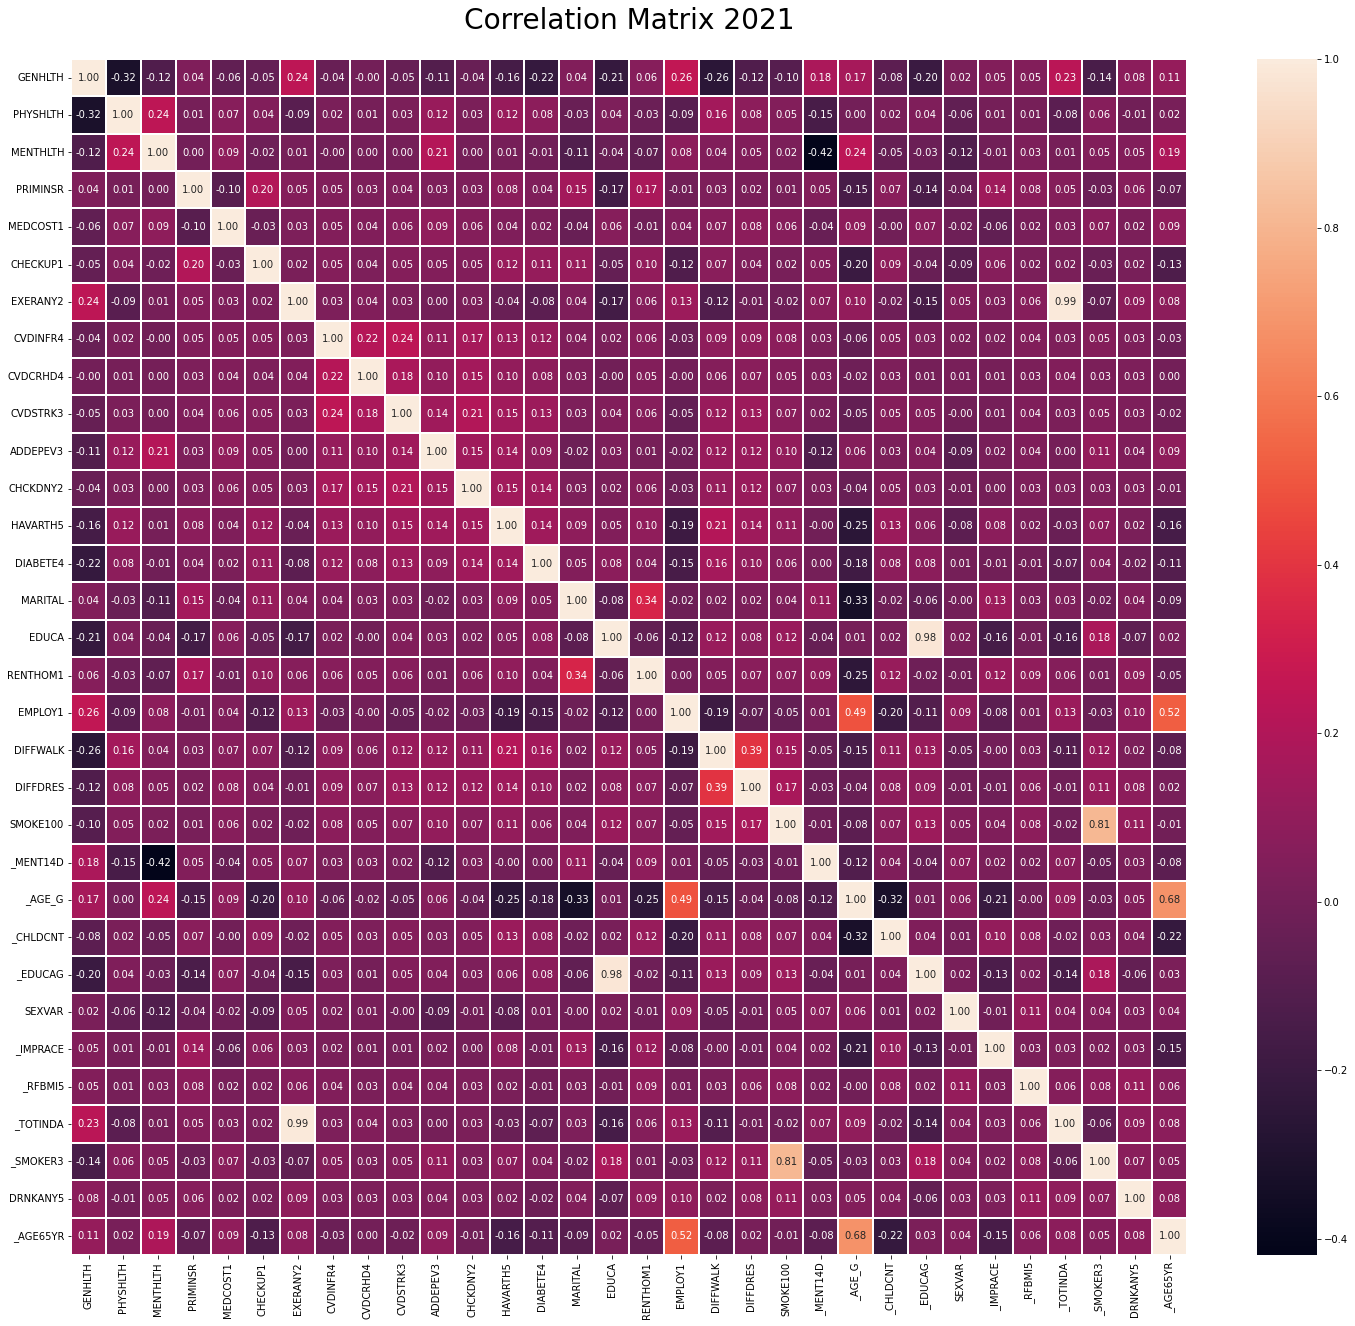

In [36]:

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25, 22))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.3)
plt.title('Correlation Matrix 2021', fontsize = 28 , y=1.02)
plt.savefig(r"..\graphs\EDA\2021\\" + "corr-heatmap-2021.png", facecolor = "white", bbox_inches = "tight", pad_inches = 0.5)
plt.show()

In [38]:
import pandas as pd

# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Specify the target column
target_column = 'CVDCRHD4'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with respect to the target column (excluding the target column itself)
correlation_with_target = correlation_matrix[target_column].drop(target_column).sort_values(ascending=False)

# Create a DataFrame to store the results
correlation_results_df = pd.DataFrame({
    'Feature': correlation_with_target.index,
    '2021-Correlation_with_Target': correlation_with_target.values
})

# Display the correlation table
correlation_results_df



,Feature,2021-Correlation_with_Target
0,CVDINFR4,0.215144
1,CVDSTRK3,0.175331
2,CHCKDNY2,0.154108
3,HAVARTH5,0.098415
4,ADDEPEV3,0.097809
5,DIABETE4,0.083354
6,DIFFDRES,0.071795
7,DIFFWALK,0.055257
8,RENTHOM1,0.050542
9,SMOKE100,0.050218


In [39]:
output_path = r"..\outputs\\2021\\"
correlation_results_df.to_csv(output_path + "correlation_results.csv")



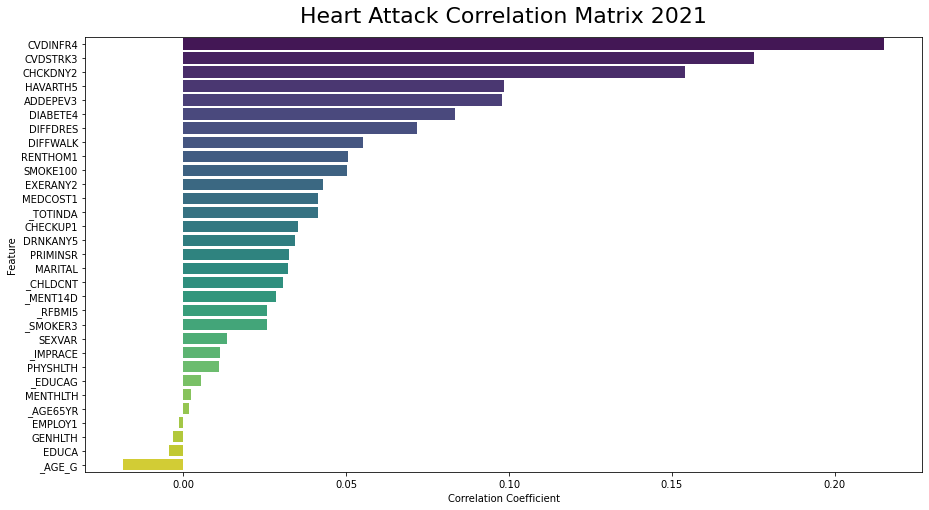

In [40]:
# Plot the correlations
plt.figure(figsize=(15, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="viridis")
plt.title('Heart Attack Correlation Matrix 2021', fontsize = 22 , y=1.02)
plt.savefig(r"..\graphs\EDA\2021\\" + "heart-attack-corr-matrix-2021.png", facecolor = "white", bbox_inches = "tight", pad_inches = 0.3)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()